### Import Libraries
NOTE: You need to "pip install coinmetrics" in order to use api this.  No api key is required.<BR>
API Documentation: https://coinmetrics.readthedocs.io/en/latest/community.html

In [4]:
# Import Libraries:
import coinmetrics # Coinmetrics API
import datetime # Datetime Feature
import pandas as pd # Import Pandas
import panel as pn # Import Panel
import plotly.express as px # Import Plotly
pn.extension("plotly")# Import Plotly Extension

# Initialize a reference object (in this case `cm` for the Coinmetrics Community API)
cm = coinmetrics.Community()

ModuleNotFoundError: No module named 'coinmetrics'

### List of Supported Assets

In [3]:
# List the assets Coin Metrics has data for:
supported_assets = cm.get_supported_assets()
print("supported assets:\n", supported_assets)

NameError: name 'cm' is not defined

### List of Available Metrics

In [9]:
# List all available metrics for a specific asset:
#INPUTS
asset = "eth"
available_data_types = cm.get_available_data_types_for_asset(asset)

# PRINT OUTPUT
print(f"These are the available data type for {asset}:\n \n", available_data_types)

These are the available data type for eth:
 
 ['AdrActCnt', 'AdrBal1in100KCnt', 'AdrBal1in100MCnt', 'AdrBal1in10BCnt', 'AdrBal1in10KCnt', 'AdrBal1in10MCnt', 'AdrBal1in1BCnt', 'AdrBal1in1KCnt', 'AdrBal1in1MCnt', 'AdrBalCnt', 'AdrBalNtv0.001Cnt', 'AdrBalNtv0.01Cnt', 'AdrBalNtv0.1Cnt', 'AdrBalNtv100Cnt', 'AdrBalNtv100KCnt', 'AdrBalNtv10Cnt', 'AdrBalNtv10KCnt', 'AdrBalNtv1Cnt', 'AdrBalNtv1KCnt', 'AdrBalNtv1MCnt', 'AdrBalUSD100Cnt', 'AdrBalUSD100KCnt', 'AdrBalUSD10Cnt', 'AdrBalUSD10KCnt', 'AdrBalUSD10MCnt', 'AdrBalUSD1Cnt', 'AdrBalUSD1KCnt', 'AdrBalUSD1MCnt', 'AssetEODCompletionTime', 'BlkCnt', 'BlkSizeMeanByte', 'CapAct1yrUSD', 'CapMVRVCur', 'CapMVRVFF', 'CapMrktCurUSD', 'CapMrktFFUSD', 'CapRealUSD', 'DiffLast', 'DiffMean', 'FeeByteMeanNtv', 'FeeMeanNtv', 'FeeMeanUSD', 'FeeMedNtv', 'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'FlowInExNtv', 'FlowInExUSD', 'FlowOutExNtv', 'FlowOutExUSD', 'FlowTfrFromExCnt', 'GasLmtBlk', 'GasLmtBlkMean', 'GasLmtTx', 'GasLmtTxMean', 'GasUsedTx', 'GasUsedTxMean', 'H

### Fetch Metric

In [10]:
# Example: Fetch the `PriceUSD` and `ROI30d` data for BTC from 2019-01-01 to 2019-01-08.
#INPUTS
asset = "eth"  # See list printed above
metric = "PriceUSD,ROI30d"
begin_timestamp = "2019-01-01"  # The `datetime` type is also accepted
end_timestamp = "2019-01-08"  # The `datetime` type is also accepted

# PRINT OUTPUT
asset_data = cm.get_asset_data_for_time_range(asset, metric, begin_timestamp, end_timestamp).json
print(asset_data)

{'metrics': ['PriceUSD', 'ROI30d'], 'series': [{'time': '2019-01-01T00:00:00.000Z', 'values': ['139.154644360023', '21.136921649098255']}, {'time': '2019-01-02T00:00:00.000Z', 'values': ['154.426368790181', '43.73788484042323']}, {'time': '2019-01-03T00:00:00.000Z', 'values': ['147.06208679135', '35.67480011247676']}, {'time': '2019-01-04T00:00:00.000Z', 'values': ['153.442376972531', '51.72381830825383']}, {'time': '2019-01-05T00:00:00.000Z', 'values': ['154.301756867329', '69.91187623203629']}, {'time': '2019-01-06T00:00:00.000Z', 'values': ['155.940283167738', '69.26312575537388']}, {'time': '2019-01-07T00:00:00.000Z', 'values': ['150.346131794272', '65.94652933624539']}, {'time': '2019-01-08T00:00:00.000Z', 'values': ['149.052762711864', '60.282135696159266']}]}


### Fetch Metric on Specific Date

In [11]:
#INPUTS
asset = "eth"
metric = "NVTAdj"
begin_timestamp = "2021-10-30"  # The `datetime` type is also accepted
end_timestamp = "2021-10-30"  # The `datetime` type is also accepted

# PRINT OUTPUT
asset_data = cm.get_asset_data_for_time_range(asset, metric, begin_timestamp, end_timestamp)
print(f" The {metric} of {asset} on {begin_timestamp} is {asset_data['series'][0]['values'][0]}")

 The NVTAdj of eth on 2021-10-30 is 48.836259569061


### Fetch Data to Build Dataframe

In [33]:
# SETUP
# Initialize empty lists to fill with data fetched from api
date = []
nvtadj = []
price = []

# API INPUTS
asset = "btc"
metric = "NVTAdj,PriceUSD"
begin_timestamp = datetime.date(2021,9,30)
end_timestamp = datetime.date(2021,10,30)


# API OUTPUT
asset_data = cm.get_asset_data_for_time_range(asset, metric, begin_timestamp, end_timestamp)

# Use For Loop to interate through data and populate lists
for entry in asset_data['series']:
    date.append(entry['time'])
    nvtadj.append(float(entry['values'][0])*750)
    price.append(float(entry['values'][1]))
    
# Print Date List
print("DATES: \n\n", date, "\n\n")

# Print nvtadj List
print("NVT Adj: \n\n", nvtadj, "\n\n")

# Print nvtadj List
print("Price: \n\n", price, "\n\n")

DATES: 

 ['2021-09-30T00:00:00.000Z', '2021-10-01T00:00:00.000Z', '2021-10-02T00:00:00.000Z', '2021-10-03T00:00:00.000Z', '2021-10-04T00:00:00.000Z', '2021-10-05T00:00:00.000Z', '2021-10-06T00:00:00.000Z', '2021-10-07T00:00:00.000Z', '2021-10-08T00:00:00.000Z', '2021-10-09T00:00:00.000Z', '2021-10-10T00:00:00.000Z', '2021-10-11T00:00:00.000Z', '2021-10-12T00:00:00.000Z', '2021-10-13T00:00:00.000Z', '2021-10-14T00:00:00.000Z', '2021-10-15T00:00:00.000Z', '2021-10-16T00:00:00.000Z', '2021-10-17T00:00:00.000Z', '2021-10-18T00:00:00.000Z', '2021-10-19T00:00:00.000Z', '2021-10-20T00:00:00.000Z', '2021-10-21T00:00:00.000Z', '2021-10-22T00:00:00.000Z', '2021-10-23T00:00:00.000Z', '2021-10-24T00:00:00.000Z', '2021-10-25T00:00:00.000Z', '2021-10-26T00:00:00.000Z', '2021-10-27T00:00:00.000Z', '2021-10-28T00:00:00.000Z', '2021-10-29T00:00:00.000Z', '2021-10-30T00:00:00.000Z'] 


NVT Adj: 

 [26715.43846342725, 30712.717009716, 53404.592752601995, 45092.2337747505, 38675.961837435, 33667.62028380

### Create Dataframe

In [34]:
date_df = pd.DataFrame(date, columns = ["Date"])
nvtadj_df = pd.DataFrame(nvtadj, columns = ["NVT Adj"])
price_df = pd.DataFrame(price, columns = ["Price"])
df = pd.concat([date_df, nvtadj_df, price_df], axis='columns', join='inner')
df.head()

,Date,NVT Adj,Price
0,2021-09-30T00:00:00.000Z,26715.438463,43781.546015
1,2021-10-01T00:00:00.000Z,30712.717010,48078.131554
2,2021-10-02T00:00:00.000Z,53404.592753,47792.439194
3,2021-10-03T00:00:00.000Z,45092.233775,48202.622918
4,2021-10-04T00:00:00.000Z,38675.961837,49288.501311


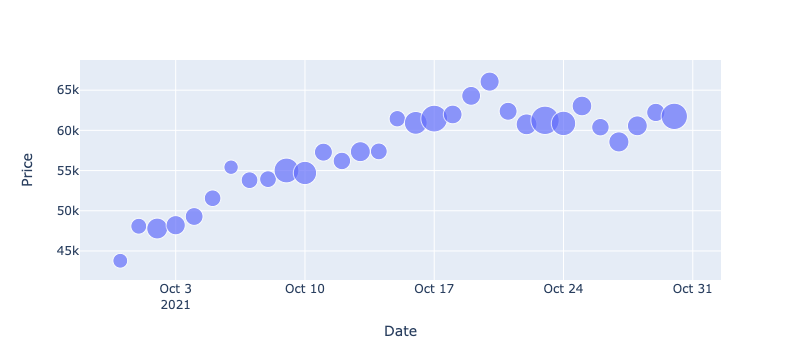

In [39]:
px.scatter(df, x='Date', y='Price', size='NVT Adj')

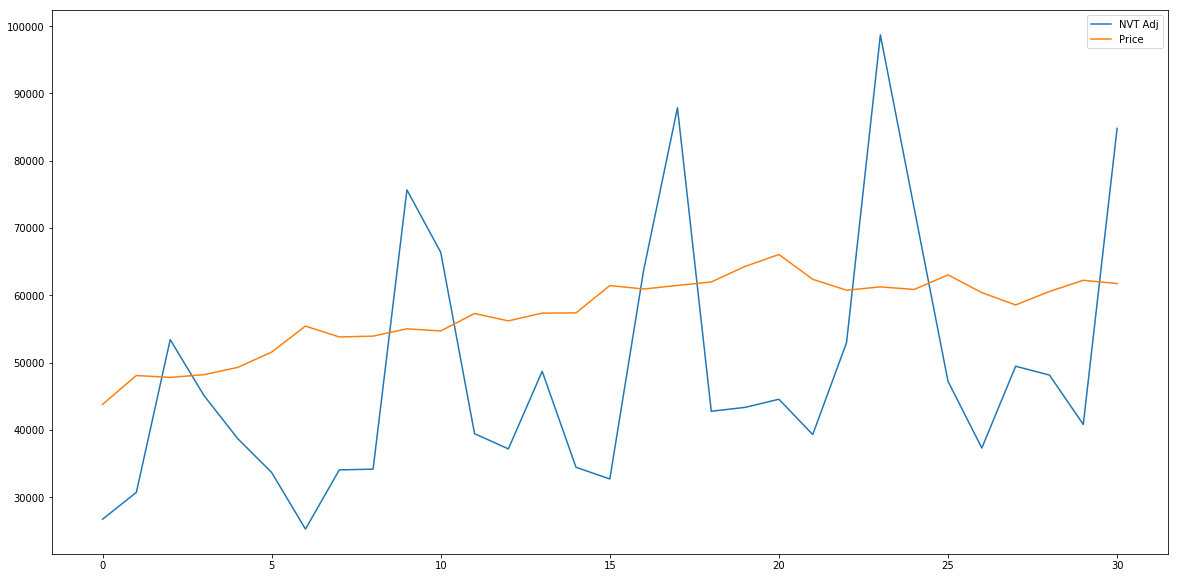

In [36]:
df.plot(figsize = (20,10))